In [5]:
library(dplyr)
library(ggplot2)

In [6]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
mysuffix = "pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point-treatment.celltype_counts.tsv"

myfilename = paste0(mydir,mysuffix)
df2 = read.table(myfilename, header = T)
df2$celltype <- as.character(df2$celltype)
df2$celltype[df2$celltype == "CHem"] <- "U_Neur1"
df2$celltype[df2$celltype == "unknown"] <- "U_Neur3"
head(df2)

donor_id,pool_id,time_point,treatment,celltype,n_cells
HPSI0114i-bezi_3,pool10,D52,NONE,Astro,2
HPSI0114i-bezi_3,pool10,D52,NONE,U_Neur1,5
HPSI0114i-bezi_3,pool10,D52,NONE,DA,66
HPSI0114i-bezi_3,pool10,D52,NONE,Epen1,39
HPSI0114i-bezi_3,pool10,D52,NONE,FPP,31
HPSI0114i-bezi_3,pool10,D52,NONE,P_FPP,4


In [8]:
df_tot_d52_mid = df2[df2$celltype %in% c("DA","Sert"),] %>% group_by(donor_id,pool_id) %>% 
                                                        summarize(total_midbrain_cells = sum(n_cells))

In [9]:
nrow(df_tot_d52_mid)

[1] 230

In [10]:
df_tot_d52 = df2 %>% group_by(donor_id,pool_id) %>% summarize(total_cells = sum(n_cells))
nrow(df_tot_d52)

[1] 232

In [11]:
df = inner_join(df_tot_d52, df_tot_d52_mid, by = c("donor_id","pool_id"))
nrow(df)
head(df)

[1] 230

donor_id,pool_id,total_cells,total_midbrain_cells
HPSI0114i-bezi_3,pool10,393,229
HPSI0114i-eipl_1,pool1,25935,334
HPSI0114i-fikt_3,pool14,283,114
HPSI0114i-kolf_2,pool10,243,122
HPSI0114i-kolf_2,pool15,2423,1064
HPSI0114i-lexy_2,pool10,453,359


In [12]:
df$diff_eff = df$total_midbrain_cells/df$total_cells
head(df)

donor_id,pool_id,total_cells,total_midbrain_cells,diff_eff
HPSI0114i-bezi_3,pool10,393,229,0.58269720
HPSI0114i-eipl_1,pool1,25935,334,0.01287835
HPSI0114i-fikt_3,pool14,283,114,0.40282686
HPSI0114i-kolf_2,pool10,243,122,0.50205761
HPSI0114i-kolf_2,pool15,2423,1064,0.43912505
HPSI0114i-lexy_2,pool10,453,359,0.79249448


In [14]:
library(lme4)

Loading required package: Matrix


In [15]:
coldata = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/metadata_all_lines.csv", row.names = 1)
head(coldata)

,donor_id,Gender,Age,feederfree,min_age,max_age,avg_age,origin_cell,reprogramming_method
HPSI0813i-ffdc_1,HPSI0813i-ffdc_1,male,40-44,n,40,44,42,fibroblast,sendai
HPSI0213i-nawk_55,HPSI0213i-nawk_55,male,,y,NA,NA,NA,fibroblast,sendai
HPSI0513i-uoxz_4,HPSI0513i-uoxz_4,female,,n,NA,NA,NA,fibroblast,sendai
HPSI0513i-veve_2,HPSI0513i-veve_2,female,,n,NA,NA,NA,fibroblast,sendai
HPSI0413i-peop_4,HPSI0413i-peop_4,male,,y,NA,NA,NA,fibroblast,sendai
HPSI0613i-hikj_2,HPSI0613i-hikj_2,male,,n,NA,NA,NA,fibroblast,sendai


In [16]:
df2 = inner_join(df, as.data.frame(coldata), by = "donor_id")
head(df2)

Warning message:
“Column `donor_id` joining factors with different levels, coercing to character vector”

donor_id,pool_id,total_cells,total_midbrain_cells,diff_eff,Gender,Age,feederfree,min_age,max_age,avg_age,origin_cell,reprogramming_method
HPSI0114i-bezi_3,pool10,393,229,0.58269720,female,60-64,n,60,64,62,fibroblast,sendai
HPSI0114i-eipl_1,pool1,25935,334,0.01287835,female,40-44,n,40,44,42,fibroblast,sendai
HPSI0114i-fikt_3,pool14,283,114,0.40282686,male,50-54,y,50,54,52,fibroblast,sendai
HPSI0114i-kolf_2,pool10,243,122,0.50205761,male,55-59,n,55,59,57,fibroblast,sendai
HPSI0114i-kolf_2,pool15,2423,1064,0.43912505,male,55-59,n,55,59,57,fibroblast,sendai
HPSI0114i-lexy_2,pool10,453,359,0.79249448,female,60-64,n,60,64,62,fibroblast,sendai


In [17]:
lmm2 <- lmer(diff_eff ~ (1 | donor_id) + (1 | pool_id) + (1 | Gender) + (1 | Age), data = df2, REML = F)

In [18]:
summary(lmm2)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: diff_eff ~ (1 | donor_id) + (1 | pool_id) + (1 | Gender) + (1 |  
    Age)
   Data: df2

     AIC      BIC   logLik deviance df.resid 
    58.9     79.5    -23.4     46.9      224 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.15475 -0.39201  0.05323  0.38175  1.98436 

Random effects:
 Groups   Name        Variance Std.Dev.
 donor_id (Intercept) 0.064167 0.25331 
 pool_id  (Intercept) 0.006213 0.07883 
 Age      (Intercept) 0.003635 0.06029 
 Gender   (Intercept) 0.002466 0.04966 
 Residual             0.012674 0.11258 
Number of obs: 230, groups:  donor_id, 197; pool_id, 16; Age, 12; Gender, 2

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.49032    0.04962   9.881

In [19]:
donor = summary(lmm2)$varcor$donor_id[1,1]
pool = summary(lmm2)$varcor$pool_id[1,1]
sex = summary(lmm2)$varcor$Gender[1,1]
age = summary(lmm2)$varcor$Age[1,1]
residual = summary(lmm2)$sigma **2
#
sum = donor+pool+sex+age+residual

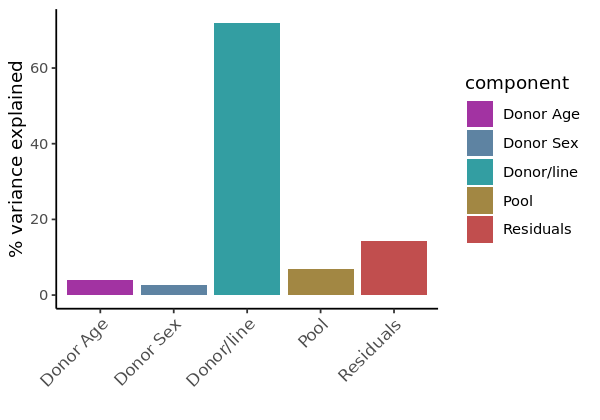

In [21]:
options(repr.plot.width = 5, repr.plot.height = 3.5)
df_plot = data.frame(component = c("Donor/line","Pool","Donor Sex","Donor Age","Residuals"),
               variance = c(donor/sum, pool/sum, sex/sum, age/sum, residual/sum))
p = ggplot(df_plot, aes(x = component, y = variance*100, fill = component)) + geom_bar(stat="identity", alpha = 0.8)
p = p + xlab("") + ylab("% variance explained") + theme_classic() 
p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10))
p + scale_fill_manual(values = c("darkmagenta","steelblue4","turquoise4","goldenrod4","firebrick"))

In [22]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/extended_figures/"
pdf(paste0(fig_dir,"SF_9c.pdf"), width=5, height=3.5)
p + scale_fill_manual(values = c("darkmagenta","steelblue4","turquoise4","goldenrod4","firebrick"))
dev.off()

png 
  2

In [23]:
xci_data = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/metadata/neuroseq_x_chrom_inactivation_data.tsv"
xci = read.csv(xci_data, sep = "\t")
xci$donor_id = xci$cell_line_id
head(xci)

cell_line_id,mean_x_chrom_ase,Gender,donor_id
HPSI0114i-eipl_1,0.1885190,female,HPSI0114i-eipl_1
HPSI1113i-podx_1,0.1726990,female,HPSI1113i-podx_1
HPSI0115i-hecn_6,0.1202075,female,HPSI0115i-hecn_6
HPSI0214i-pelm_3,0.1304638,female,HPSI0214i-pelm_3
HPSI0214i-eiwy_1,0.2483968,female,HPSI0214i-eiwy_1
HPSI0714i-iudw_1,0.1152498,female,HPSI0714i-iudw_1


In [24]:
nrow(df2)
df3 = inner_join(xci, df2, by = c("donor_id","Gender"))
nrow(df3)
head(df3,2)

[1] 230

Warning message:
“Column `donor_id` joining factor and character vector, coercing into character vector”Warning message:
“Column `Gender` joining factors with different levels, coercing to character vector”

[1] 115

cell_line_id,mean_x_chrom_ase,Gender,donor_id,pool_id,total_cells,total_midbrain_cells,diff_eff,Age,feederfree,min_age,max_age,avg_age,origin_cell,reprogramming_method
HPSI0114i-eipl_1,0.188519,female,HPSI0114i-eipl_1,pool1,25935,334,0.01287835,40-44,n,40,44,42,fibroblast,sendai
HPSI1113i-podx_1,0.172699,female,HPSI1113i-podx_1,pool1,3651,2138,0.58559299,65-69,n,65,69,67,fibroblast,sendai


In [25]:
df3$xci[df3$mean_x_chrom_ase > 0 & df3$mean_x_chrom_ase < 0.1] = '0-0.1'
df3$xci[df3$mean_x_chrom_ase > 0.1 & df3$mean_x_chrom_ase < 0.2] = '0.1-0.2'
df3$xci[df3$mean_x_chrom_ase > 0.2 & df3$mean_x_chrom_ase < 0.3] = '0.2-0.3'
df3$xci[df3$mean_x_chrom_ase > 0.3 & df3$mean_x_chrom_ase < 0.4] = '0.3-0.4'
df3$xci[df3$mean_x_chrom_ase > 0.4 & df3$mean_x_chrom_ase < 0.5] = '0.4-0.5'
head(df3,2)

cell_line_id,mean_x_chrom_ase,Gender,donor_id,pool_id,total_cells,total_midbrain_cells,diff_eff,Age,feederfree,min_age,max_age,avg_age,origin_cell,reprogramming_method,xci
HPSI0114i-eipl_1,0.188519,female,HPSI0114i-eipl_1,pool1,25935,334,0.01287835,40-44,n,40,44,42,fibroblast,sendai,0.1-0.2
HPSI1113i-podx_1,0.172699,female,HPSI1113i-podx_1,pool1,3651,2138,0.58559299,65-69,n,65,69,67,fibroblast,sendai,0.1-0.2


In [26]:
lmm3 <- lmer(diff_eff ~ (1 | donor_id) + (1 | pool_id) + (1 | xci) + (1 | Age), data = df3, REML = F)

In [27]:
summary(lmm3)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: diff_eff ~ (1 | donor_id) + (1 | pool_id) + (1 | xci) + (1 |      Age)
   Data: df3

     AIC      BIC   logLik deviance df.resid 
    28.7     45.2     -8.3     16.7      109 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8784 -0.3439  0.0819  0.3385  1.7213 

Random effects:
 Groups   Name        Variance Std.Dev.
 donor_id (Intercept) 0.058460 0.24179 
 pool_id  (Intercept) 0.006777 0.08232 
 Age      (Intercept) 0.002452 0.04952 
 xci      (Intercept) 0.003419 0.05847 
 Residual             0.012070 0.10987 
Number of obs: 115, groups:  donor_id, 97; pool_id, 16; Age, 12; xci, 4

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.53509    0.05001    10.7

In [28]:
donor = summary(lmm3)$varcor$donor_id[1,1]
pool = summary(lmm3)$varcor$pool_id[1,1]
xci = summary(lmm3)$varcor$xci[1,1]
sex = summary(lmm3)$varcor$Gender[1,1]
age = summary(lmm3)$varcor$Age[1,1]
residual = summary(lmm3)$sigma **2
#
sum = donor+pool+xci+age+residual

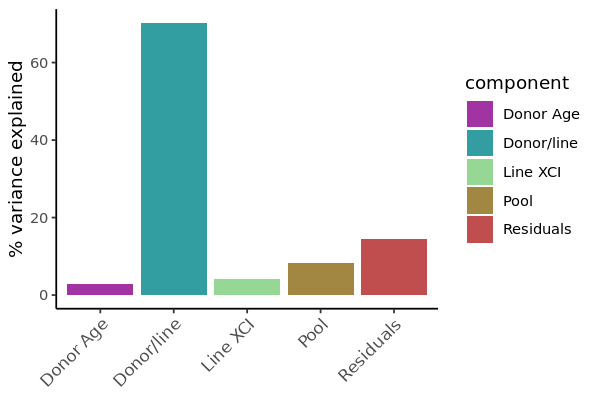

In [29]:
options(repr.plot.width = 5, repr.plot.height = 3.5)
df_plot = data.frame(component = c("Donor/line","Pool","Line XCI","Donor Age","Residuals"),
               variance = c(donor/sum, pool/sum, xci/sum, age/sum, residual/sum))
p = ggplot(df_plot, aes(x = component, y = variance*100, fill = component)) + geom_bar(stat="identity", alpha = 0.8)
p = p + xlab("") + ylab("% variance explained") + theme_classic() 
p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10))
p + scale_fill_manual(values = c("darkmagenta","turquoise4","palegreen3","goldenrod4","firebrick"))

In [60]:
cor.test(df3$diff_eff, df3$mean_x_chrom_ase)


	Pearson's product-moment correlation

data:  df3$diff_eff and df3$mean_x_chrom_ase
t = 3.4516, df = 113, p-value = 0.0007847
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1332540 0.4656093
sample estimates:
     cor 
0.308829 


In [ ]:
pdf(paste0(fig_dir,"SF_9c.pdf"), width=5, height=3.5)
p + scale_fill_manual(values = c("darkmagenta","steelblue4","turquoise4","goldenrod4","firebrick"))
dev.off()